## <b> RETURN ON ASSETS (ROA) ANALYSIS </b>
(by Avril Childs)


## Definition 

**Return on Assets** measures how profitable a company is relative to its assets and indicates how efficiently a company uses its assest to generate profits. 

> ROA  = Net Income / total assets

* Net income is also described as the net operating profit after tax.
* ROA factors in a company's debt whereas Return on Equity does not


A **high ROA** indicates that the company is generating a lot of profit for every dollar of capital it uses. A  **negative ROA** means the company negative earnings. A low ROA may indicate that a company isn't efficient in turning its assets into profit. 

In [1]:
import numpy as np
import pandas as pd
import scipy.stats as stats
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px

## Exploring the Dataset


In [2]:
roa_df =  pd.read_excel('Stock_Screening_CFG v2.xlsx', sheet_name='ROA', index_col=0)
roa_df.head(20)

,NasdaqGS:MSFT,NasdaqGS:AAPL,NasdaqGS:NVDA,NasdaqGS:AMZN,NasdaqGS:GOOGL,NasdaqGS:META,NYSE:BRK.B,NasdaqGS:AVGO,NasdaqGS:TSLA,NYSE:LLY,...,NYSE:IVZ,NYSE:DVA,NasdaqGS:AAL,NYSE:MHK,NYSE:BEN,NYSE:RL,NYSE:BIO,NasdaqGS:PARA,NasdaqGS:FOX,NasdaqGS:NWS
Date,,,,,,,,,,,,,,,,,,,,,
2024-07-20,14.8020,22.6119,49.1033,6.5835,15.9608,17.6608,5.0795,7.3148,4.4162,13.7030,...,1.9220,6.8015,2.7790,3.9083,2.6652,7.5105,2.1125,3.1666,6.9631,2.9236
2024-06-30,14.8020,22.6119,49.1033,6.5835,15.9608,17.6608,5.0795,7.3148,4.4162,13.7030,...,1.9220,6.8015,2.7790,3.9083,2.6652,7.5105,2.1125,3.1666,6.9631,2.9236
2024-05-31,15.4104,22.0738,49.1033,5.9508,15.6079,17.3134,5.7110,7.3148,4.7166,12.6040,...,1.7680,6.3607,3.5135,3.5803,2.9940,7.4288,1.6915,2.6441,6.6562,2.8068
2024-04-30,15.4104,22.0738,49.1033,5.9508,15.6079,17.3134,5.7110,7.5414,4.7166,12.6040,...,1.7680,6.3607,3.5135,3.5803,2.9940,7.4288,1.6915,2.6441,6.6562,2.8068
2024-03-31,15.4104,22.0738,38.5511,5.9508,15.6079,17.3134,5.7110,7.5414,4.7166,12.6040,...,1.7680,6.3607,3.5135,3.5803,2.9940,7.4288,1.6915,2.6441,6.6562,2.8068
2024-02-29,15.0478,21.1810,38.5511,4.6505,13.7257,14.7484,7.6293,7.5414,5.8816,11.8806,...,1.7798,5.9170,3.9571,3.6750,3.0447,5.1488,1.6365,2.0714,6.2075,2.8744
2024-01-31,15.0478,21.1810,38.5511,4.6505,13.7257,14.7484,7.6293,14.0767,5.8816,11.8806,...,1.7798,5.9170,3.9571,3.6750,3.0447,5.1488,1.6365,2.0714,6.2075,2.8744
2023-12-31,15.0478,21.1810,27.2280,4.6505,13.7257,14.7484,7.6293,14.0767,5.8816,11.8806,...,1.7798,5.9170,3.9571,3.6750,3.0447,5.1488,1.6365,2.0714,6.2075,2.8744
2023-11-30,14.5940,20.2564,27.2280,3.7052,13.0396,13.4515,6.3622,14.0767,7.9380,11.6269,...,2.1206,5.3289,4.6066,3.2646,3.2228,5.1238,1.9096,2.1766,6.9515,2.6968


The data set shows that ROA values a duplicated in 3 month intervals . These 3 month intervals are not consistent throughout the data set, and can start on different months 

In [3]:
roa_df.shape

(115, 496)

In [4]:
roa_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2024-07-20 to 2015-01-31
Columns: 496 entries, NasdaqGS:MSFT to NasdaqGS:NWS
dtypes: float64(496)
memory usage: 446.5 KB


In [5]:
roa_df.describe()

,NasdaqGS:MSFT,NasdaqGS:AAPL,NasdaqGS:NVDA,NasdaqGS:AMZN,NasdaqGS:GOOGL,NasdaqGS:META,NYSE:BRK.B,NasdaqGS:AVGO,NasdaqGS:TSLA,NYSE:LLY,...,NYSE:IVZ,NYSE:DVA,NasdaqGS:AAL,NYSE:MHK,NYSE:BEN,NYSE:RL,NYSE:BIO,NasdaqGS:PARA,NasdaqGS:FOX,NasdaqGS:NWS
count,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.00000,115.000000,...,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000,115.000000
mean,11.490806,15.656598,15.731012,3.813020,10.720104,14.297915,4.263854,7.164365,1.31096,9.044809,...,2.831361,5.675718,2.664757,5.604129,7.081532,6.449370,2.297886,7.168232,4.413651,2.298776
std,2.724147,4.062757,9.207908,1.602123,2.394652,2.909699,2.733150,3.740744,5.64831,2.119325,...,0.627548,0.598033,5.948819,1.611929,2.665658,2.148355,0.420336,4.349158,3.985699,0.627122
min,7.204400,10.884900,6.267200,0.235000,7.744900,8.428000,-1.835800,2.898500,-7.04040,5.814800,...,1.768000,4.387800,-12.765300,2.861200,2.665200,0.941200,1.636500,2.071400,0.000000,1.328000
25%,9.202600,11.853300,10.154000,2.441750,8.885100,12.098300,2.870500,3.906950,-3.92800,7.082800,...,2.278750,5.218700,0.014800,4.191500,5.229750,5.661300,1.927200,4.066900,0.000000,1.714650
50%,10.881000,14.754500,13.184500,3.972400,9.702900,14.648300,3.857500,5.870300,0.30610,8.952100,...,2.919600,5.754900,4.142500,5.903500,6.954600,7.009800,2.184300,6.944200,6.891300,2.335600
75%,14.591500,19.874800,18.593400,5.206600,12.835750,16.818400,5.711000,10.947200,5.41530,10.745600,...,3.128900,6.136900,6.547050,7.189500,8.609750,7.374800,2.511750,7.667900,7.655100,2.694800
max,15.674300,22.611900,49.103300,6.583500,15.960800,18.567900,11.199600,14.170400,11.84680,13.703000,...,4.146700,6.801500,9.935600,7.987000,12.421100,10.903700,3.272200,20.381300,11.797400,3.651500


From this exploratory analysis, we can see that this is a time series dataframe and a wide dataset of ROA values in float. It has monthly dates in 115 rows and S&P500 company tickers in 496 columns. There are some large gaps between the max values vs 75% percentile, eg NasdaqGS:NVDA 75% - 18.59 (75%) and 49.10 (Max) suggesting there may be outliers in the data.   


## Data Cleaning 

#### 1. Normalising Column and row indexes 



In [6]:
#removing prefix and ':' in each column
roa_df.columns = [column.split(":")[-1] for column in roa_df.columns] 
roa_df.columns

Index(['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOGL', 'META', 'BRK.B', 'AVGO',
       'TSLA', 'LLY',
       ...
       'IVZ', 'DVA', 'AAL', 'MHK', 'BEN', 'RL', 'BIO', 'PARA', 'FOX', 'NWS'],
      dtype='object', length=496)

In [7]:
# ensuring rows are in datetime
roa_df.index = pd.to_datetime(roa_df.index)  

#### 2. Exploring zero / not meaningful values



In [8]:
#Checking number of zero values by producing a dataframe of companies with zero values
zero_counts = (roa_df == 0).sum()
zero_counts = zero_counts[zero_counts> 0]
zero_df = zero_counts.reset_index()
zero_df.columns = ['Company', 'Zero_Count']
zero_df


,Company,Zero_Count
0,UBER,44
1,CRWD,45
2,ABNB,68
3,PYPL,9
4,CARR,56
5,LHX,12
6,GEV,112
7,SMCI,18
8,MRNA,47
9,OTIS,56


In [9]:
#Checking missing values
nan_counts = roa_df.isna().sum()
nan_counts = nan_counts[nan_counts >0]
nan_df =  nan_counts.reset_index()
nan_df.columns = ['Company', 'NaN_Count']
nan_df

,Company,NaN_Count


There are no missing values in the data frame.

##### <b> Visualising Consecutive Zeros </b> 
ROA can be zeros if net income is 0 (i.e break-even). However, extended periods with zero ROA values ("zero runs") are uncommon and may indicate potential data errors. Therefore, it is important to visualise these patterns within the dataframe to help assess and set an appropriate threshold for acceptable zero runs. 

In [10]:
def find_zero_runs(df, threshold=3):
    results = []
    

    for col in df.columns:
        is_zero = df[col] == 0
        groups = is_zero.ne(is_zero.shift()).cumsum() # shifts the to the previous time step. .ne() compares with previous one and returns TRUE if not equal

        # Group where value is zero
        zero_streaks = is_zero.groupby(groups).sum()
        streak_lengths = zero_streaks[zero_streaks > threshold]  # only real streaks

        max_streak = streak_lengths.max() 
        total_streaks = len(streak_lengths)

        if max_streak > threshold:
            results.append({
                'Company': col,
                'Max_Consecutive_Zeros': max_streak,
                'Total_Zero_Runs': total_streaks
            })

    return pd.DataFrame(results)

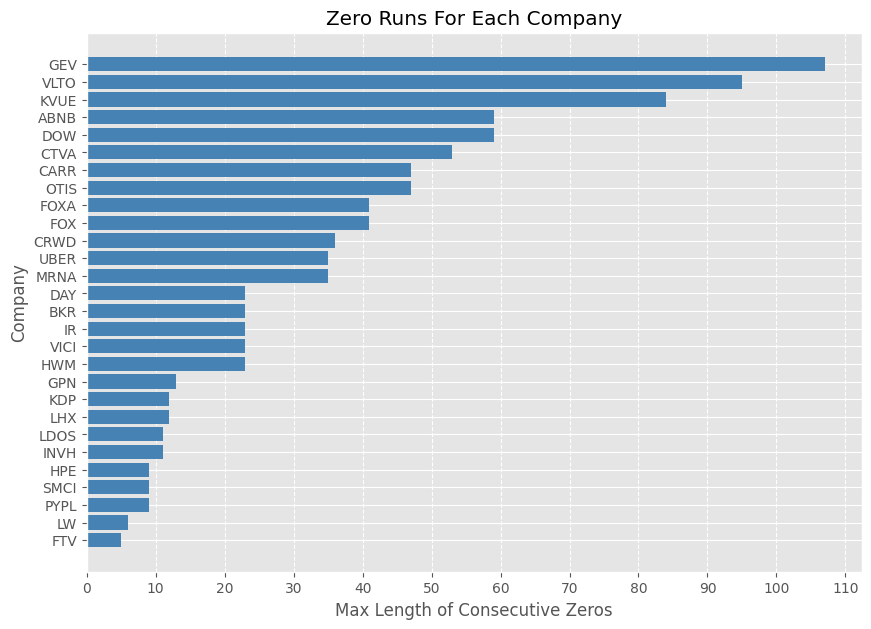

In [11]:
zero_df = find_zero_runs(roa_df, threshold=3)  # checking for zero runs more than the threshold of 3 months
zero_df.set_index('Company', inplace=True)
zero_df = zero_df.sort_values('Max_Consecutive_Zeros', ascending=True)


x =zero_df['Max_Consecutive_Zeros'] 
y = zero_df.index

plt.figure(figsize=(10, 7))
plt.style.use('ggplot')
plt.barh(y,x, color = 'steelblue')
plt.title('Zero Runs For Each Company')
plt.xlabel('Max Length of Consecutive Zeros')
plt.ylabel('Company')
plt.xticks(np.arange(0, (x.max()) + 10, 10))
plt.grid(axis='x', linestyle='--')

The majority of zero streaks last longer than 12 months. Replacing long sequences of zeros with either zero or average values could introduc bias into the dataset. Therefore, any records that contain 12 or more consecutive months of zero values are dropped from the data set. 

In [12]:
#drop columns with more than 12 months of consecutive zero values
companies_dropped_df = zero_df[zero_df['Max_Consecutive_Zeros']  > 12]
companies_dropped_df
companies_dropped_df.to_csv('data/roa_dropped_companies.csv')
companies_dropped_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 19 entries, GPN to GEV
Data columns (total 2 columns):
 #   Column                 Non-Null Count  Dtype
---  ------                 --------------  -----
 0   Max_Consecutive_Zeros  19 non-null     int64
 1   Total_Zero_Runs        19 non-null     int64
dtypes: int64(2)
memory usage: 456.0+ bytes


In [13]:
roa_columns_remove = companies_dropped_df.index  # extracting the company tickers for dropped columns

print(roa_columns_remove)

filtered_roa_df = roa_df.drop(columns=roa_columns_remove)



Index(['GPN', 'HWM', 'VICI', 'IR', 'BKR', 'DAY', 'MRNA', 'UBER', 'CRWD', 'FOX',
       'FOXA', 'OTIS', 'CARR', 'CTVA', 'DOW', 'ABNB', 'KVUE', 'VLTO', 'GEV'],
      dtype='object', name='Company')


In total, only 19 out of 496 columns were dropped from the dataset. 

###  <b>3.Managing Outliers</b>

Winsorisation is applied to the ROA dataset to reduce the influence of extreme outliers which could otherwise distore measures of central tendencey and exaggerate variability. By capping extreme values at the 5th and 95th percentiles, we preserve the overall structure of the data while minising the impact of potentially erroneous or highly volative obserations.



In [14]:
from scipy.stats.mstats import winsorize

roa_df_winsorised = filtered_roa_df

#use a for loop to iterate over every column to change replace extreme values using winsorisation
for company in roa_df_winsorised.columns:   
    roa_data = roa_df_winsorised[company].values
    data = winsorize(roa_data, limits=(0.05, 0.05)) #setting at 5th and 95th percentile
    roa_df_winsorised[company] = data  # replacing winsorised data back into the column



In [15]:
roa_df_final =  roa_df_winsorised.sort_values(by=['Date'], ascending=True)

roa_df_final.to_csv("data/roa_data_cleaned.csv") 

In [16]:

roa_df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-01-31 to 2024-07-20
Columns: 477 entries, MSFT to NWS
dtypes: float64(477)
memory usage: 429.5 KB


#### Checking minimum and maximum values after winsorisation

In [17]:
roa_df.min().min()

np.float64(-53.1587)

In [18]:
roa_df_final.min().min()

np.float64(-22.38)

In [19]:
roa_df.max().max()

np.float64(54.8387)

In [20]:
roa_df_final.max().max()

np.float64(54.3906)

The minimum ROA value in the whole data set has now been adjusted from -53.1587 to -22.38. Similarly, the max ROA value has moved from 54.84 to 54.39 after winorisation.

### <b> 4. Transforming ROA dataset from Wide to Long Format </b>

The ROA dataframe needs to be transformed into a long format before being able to apply some statistical analysis, such as Pearson's correlation. 

## ROA Analysis 


#### <b>1. Distribution</b>

Text(0, 0.5, 'Frequency')

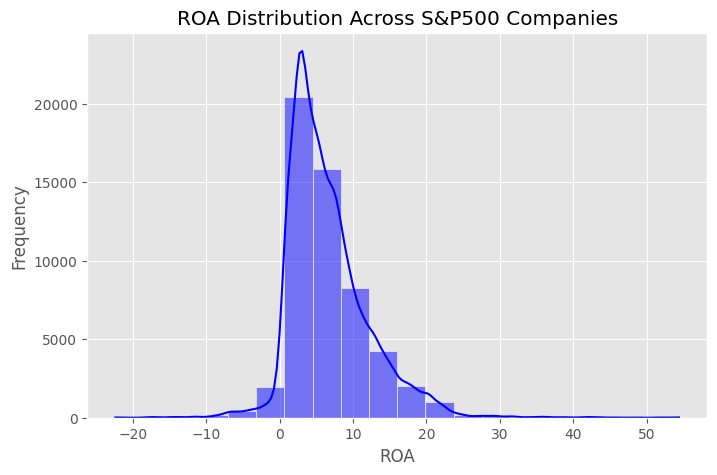

In [21]:
# Transform  wide dataset to a long dataset using melt()
roa_long = roa_df_final.melt(var_name='Company', value_name='ROA')
roa_long
# Histogram
plt.figure(figsize=(8,5))
sns.histplot(data=roa_long, x='ROA', bins=20, kde=True, color='blue')
plt.title('ROA Distribution Across S&P500 Companies')
plt.xlabel('ROA')
plt.ylabel('Frequency')


The distribution is positively skewed to the right and ROA is clustered around 0 to 10 with a peak at about 2-4, meaning that many companies in the S&P500 have a low but positive ROA. There is a long right tail where a small number of companies have a very high ROA which suggest that there are still outliers. These are rare however, and may be natural occurences.   10% winsorisation has already been applied and more aggressive winsorisation may remove more real variation and bias further analysis by underestimating the real-world variability in ROA.

#### <b> 2. Aggregate Data - Median ROA </b>

Median is chosen as it is more robust against outliers. 

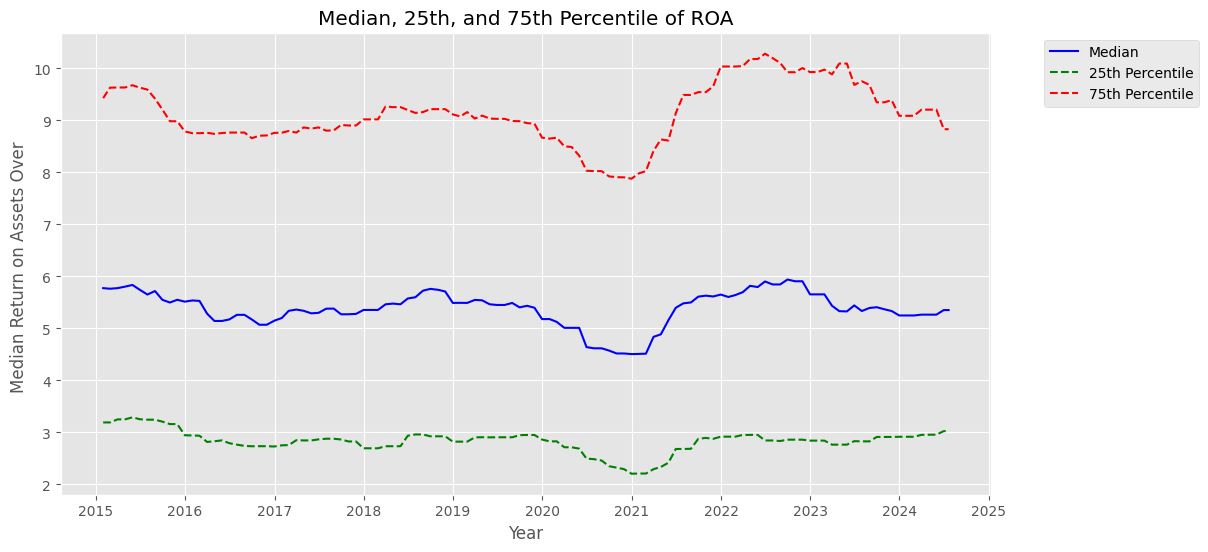

In [22]:
roa_median = roa_df_final.median(axis=1)

# Exploring the median over time with percentiles
def percentile_graph(feature_df, feature_median, feature):

    q25 = feature_df.quantile(0.25, axis=1)  # 25th percentile
    q75 = feature_df.quantile(0.75, axis=1)  # 75th percentile

    plt.figure(figsize=(12, 6))
    plt.plot(feature_median.index, feature_median, label='Median', color='blue')
    plt.plot(q25.index, q25, label='25th Percentile', color='green', linestyle='--')
    plt.plot(q75.index, q75, label='75th Percentile', color='red', linestyle='--')

    plt.xlabel('Year')
    plt.ylabel('Median Return on Assets Over ')
    plt.title(f'Median, 25th, and 75th Percentile of {feature}')
    plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
    plt.grid(True)

percentile_graph(roa_df_final, roa_median, 'ROA')

The median ROA for S&P500 companies has shown a degree of stability over the long term, but it is not immune to short-term fluctuations driven by events such as the Covid-19 pandemic in 2020, which has seen a dip and a notable rise after. The spread between the 25th and 75th percentiles remain fairly similar thoughout, thoughout it observed that the rise after the dip between 2021 and 2022 is steeper in the upper percentiles which suggest larger increases for companies with higher ROA. 

## ROA vs Stock Price Returns 

#### Cleaning and normalising Returns Data

In [23]:
returns_df = pd.read_excel('Stock_Screening_CFG v2.xlsx', sheet_name='Returns', index_col=0)
returns_df = returns_df.sort_index(ascending=True)
returns_df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 131 entries, 2013-09-30 to 2024-07-20
Columns: 496 entries, NasdaqGS:MSFT to NasdaqGS:NWS
dtypes: float64(496)
memory usage: 508.6 KB


In [26]:
returns_df.columns = [column.split(":")[-1] for column in returns_df.columns]
returns_df.columns

Index(['MSFT', 'AAPL', 'NVDA', 'AMZN', 'GOOGL', 'META', 'BRK.B', 'AVGO',
       'TSLA', 'LLY',
       ...
       'IVZ', 'DVA', 'AAL', 'MHK', 'BEN', 'RL', 'BIO', 'PARA', 'FOX', 'NWS'],
      dtype='object', length=496)

In [27]:
valid_returns_col = roa_df_final.columns
returns_df_filtered = returns_df[valid_returns_col]


In [28]:

returns_df_filled =  returns_df_filtered.fillna(0)

In [34]:
zero_counts = (returns_df_filled == 0).sum()
zero_counts = zero_counts[zero_counts >0]
zero_df =  zero_counts.reset_index()
zero_df.columns = ['Company', 'Zero_Count']
zero_df

,Company,Zero_Count
0,ABBV,1
1,BAC,1
2,KO,1
3,AMD,1
4,AMGN,1
...,...,...
64,ETSY,20
65,PAYC,8
66,DVA,1
67,AAL,4


In [35]:
returns_df_final=  returns_df_filled.loc[roa_df_final.index]

In [36]:
# checking end date of the data set
returns_df_final.info() 
roa_df_final.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-01-31 to 2024-07-20
Columns: 477 entries, MSFT to NWS
dtypes: float64(477)
memory usage: 429.5 KB
<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 115 entries, 2015-01-31 to 2024-07-20
Columns: 477 entries, MSFT to NWS
dtypes: float64(477)
memory usage: 429.5 KB


In [37]:
# Confirm same shape & index of both the Returns data and the PEG data
print(roa_df_final.shape, returns_df_final.shape)
print(roa_df_final.index.equals(returns_df_final.index))  # Should be True
print(roa_df_final.columns.equals(returns_df_final.columns))  # Should be True


(115, 477) (115, 477)
True
True


#### <b> 1. Using Aggregates - Comparing Medians </b>

In [38]:
returns_median = returns_df_final.median(axis=1)


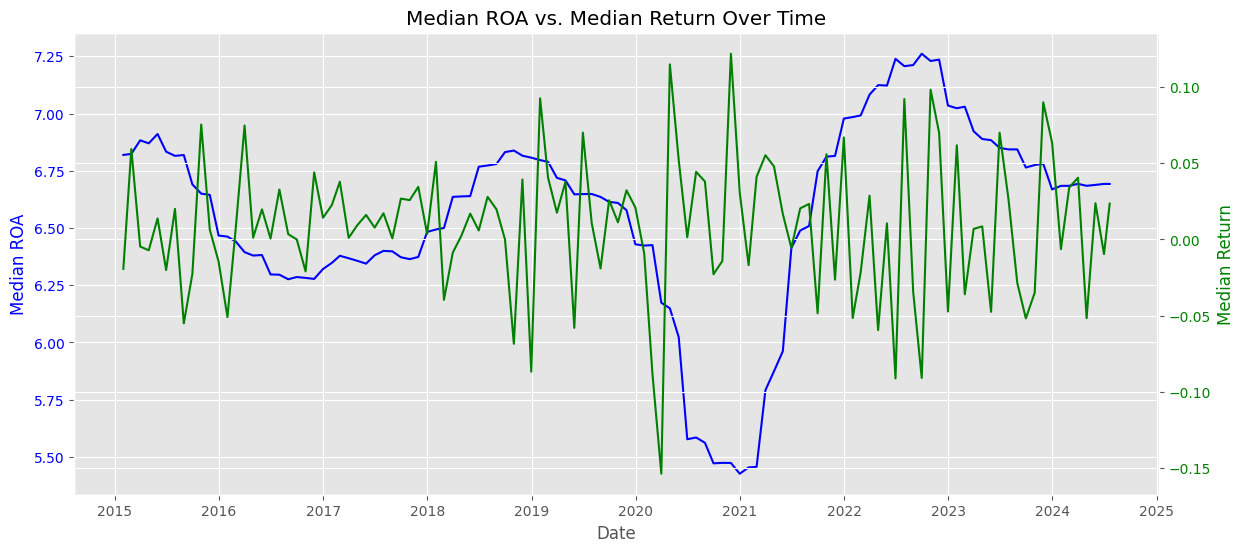

In [39]:

#Plot to represent both Median ROA and Median Returns
def median_comparison_viz(median_feature_df, median_returns_df, feature):
    fig, ax1 = plt.subplots(figsize=(14, 6))


    # Plot feature on the left y-axis
    ax1.set_xlabel('Date')
    ax1.set_ylabel(f'Median {feature}', color='blue')
    ax1.plot(median_feature_df,color='blue', label=f'Median {feature}')
    ax1.tick_params(axis='y', labelcolor='blue')

    # Create a second y-axis for returns
    ax2 = ax1.twinx()
    ax2.set_ylabel('Median Return', color='green')
    ax2.plot(median_returns_df, color='green', label='Median Return')
    ax2.tick_params(axis='y', labelcolor='green')


    plt.title(f'Median {feature} vs. Median Return Over Time')
    plt.grid(True)

median_comparison_viz(roa_median, returns_median, 'ROA')


In the above plots, it clear that stock return (green) is much more volatile than the median ROA(blue), often with little immeidate corresponding movement in the ROA. This suggests in the short term, market sentimentm investor expections and broader economic new may be influencers in stock returns, independent on the actual profitability of the companies.  

While short-term movement of Return values may not appear to correlate to ROA, a longer term relationship should be explored. It is difficult to compare overall trends due to volatile movement in the stock returns. In this instance, we can smooth the lines by using **rolling averages** of returns.

In [40]:
# Apply rolling window to smooth Returns 
returns_smoothed = returns_median.rolling(window=6, center=True).median()

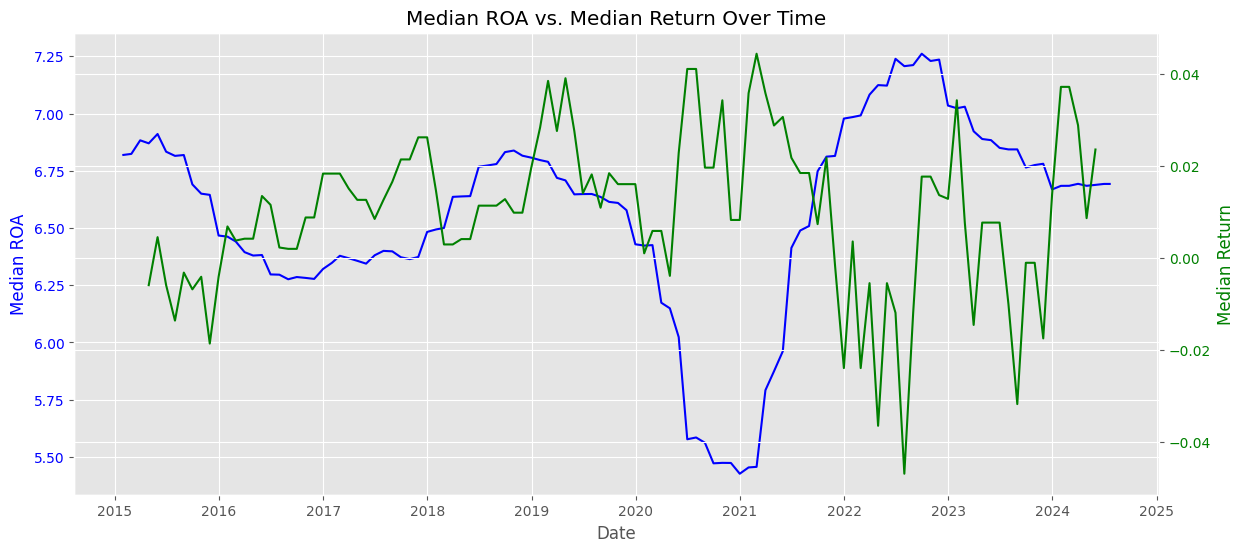

In [41]:
median_comparison_viz(roa_median, returns_smoothed, 'ROA')

By averaging the returns over six months, more persistent movement can be seen.  Sometimes changes in a company's profitability (as reflected in the ROA) might not be immediately recognised or priced. A 6-month rolling average can help if there is a lagged relationship between these two metrics. For instance and decrease in ROA between 2016 - 2018, is subsequent followed by increased ROA  2018-2019.

### <b> 2. Correlation between the Return and ROA </b>

In [42]:
#Correlation between the median values
def corr_coef(feature_df, return_df, feature):
    combined_medians = pd.concat([feature_df, return_df], axis=1)
    combined_medians.columns = [feature, 'Returns']
    correlation = combined_medians[[feature,'Returns']].corr()
    return correlation

print (corr_coef(roa_median, returns_median,'ROA'))

              ROA   Returns
ROA      1.000000 -0.157177
Returns -0.157177  1.000000



Correlation Coefficient between  median ROA vs median returns: <b>-0.18</b>


In [43]:
# Step 1: Melt the dataframes into long format
def merged_long(feature_df, returns_df, feature):
    feature_long = feature_df.reset_index().melt(id_vars='Date', var_name='Company', value_name=feature)
    returns_long = returns_df.reset_index().melt(id_vars='Date', var_name='Company', value_name='Return')
    
    for df in [feature_long, returns_long]:
        df['Date'] = pd.to_datetime(df['Date']) # Ensure datetime and sort
        df.sort_values(['Company', 'Date'], inplace=True)

# Merge dataframe on Date and Company
    merged_df = feature_long.merge(returns_long, on=['Date', 'Company'])
    merged_df = merged_df.dropna() #drop missing values


    return  merged_df

merged_df = merged_long(roa_df_final, returns_df_final, 'ROA')





In [44]:
def correlation_raw(feature):
    corr_raw = merged_df[[feature, 'Return']].corr()
    print(corr_raw)

correlation_raw('ROA')

             ROA    Return
ROA     1.000000  0.008662
Return  0.008662  1.000000


<div class="alert alert-block alert-info">
Correlation Coefficient between ROA vs Monthly returns (raw data): <b>-0.008</b>
</div>

Text(0.5, 1.0, 'Correlation between ROA vs Returns')

<Figure size 1000x600 with 0 Axes>

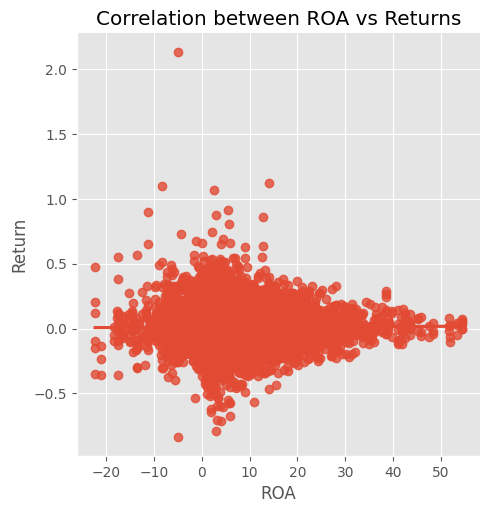

In [45]:
#Checking correlation with scatter plot
plt.figure(figsize=(10, 6))
sns.lmplot(data=merged_df, x='ROA', y='Return')
plt.title(f"Correlation between ROA vs Returns")
    

From the scatterplot of ROA vs monthly returns, we observe a dense cluster around the origin with no clear upward or downward trend. This visual insight is confirmed by the correleation coefficient of -.008, suggesting virtually no linear relationship between a company's monthly ROA and its monthly stock return. 

When using aggreating to median values by company, the correlation slightly strengthens to -0.18 but still remains weak. This hints at a slightly tendency for higher ROA to align with lower median returns, but it is not statistically strong enough to draw conclusions. 

#### More Exploratory Data Analysis of Correlation - Positive vs Negative Correlation 

In [46]:
# Visualisation of coorelation using actual returns and ROA
correlations = {}  

for company in roa_df_final.columns:
    roa_series = roa_df_final[company]
    return_series = returns_df_final[company]

    # Combine & drop rows with NaNs in either
    combined = pd.concat([roa_series, return_series], axis=1).dropna()

    if not combined.empty:
        correlations[company] = np.corrcoef(combined.iloc[:, 0], combined.iloc[:, 1])[0, 1] 

# Convert to DataFrame 
corr_roa_df = pd.Series(correlations, name='ROA_Return_Correlation').to_frame()
corr_roa_df = corr_roa_df.sort_values(by='ROA_Return_Correlation')



In [47]:
# Pie chart
# Counting positive and negative correlations
positive_count = (corr_roa_df['ROA_Return_Correlation'] > 0).sum()
negative_count = (corr_roa_df['ROA_Return_Correlation'] < 0).sum()

total = len(corr_roa_df)

Text(0.5, 1.0, 'ROA-Return Positive and Negative Correlation')

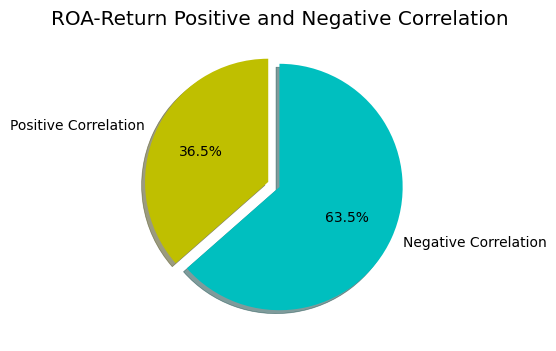

In [99]:
labels = ['Positive Correlation', 'Negative Correlation']
sizes = [positive_count, negative_count]
colors = ['y', 'c']

plt.figure(figsize=(4,4))
plt.pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90, shadow=True, explode=(0.1,0))
plt.title("ROA-Return Positive and Negative Correlation")


At a company level, the majority show negative correlation between ROA and returns, suggesting that contrary to expectations, profitability doesn't not translate directly into market performance in the short term. 

ROA is often released quarterly and is a reflection of the previous quarters growth, price and earnings. Profitability and returns might play out over longer periods or through more complex relationships. 



### <b> 3. Using Quartiles </b>

Quartile data is used to see if where the stock sits with ROA pecentile can indicate next month return.

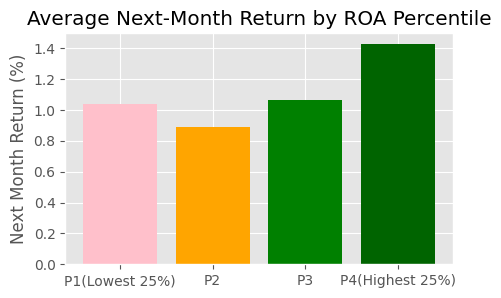

In [48]:
def plot_quartile_returns(feature_df, return_df, feature_name="Factor"):    
    # Assign quartiles row-wise
    quartiles = feature_df.apply(
        lambda x: pd.qcut(x, 4, labels=["P1(Lowest 25%)", "P2", "P3", "P4(Highest 25%)"]),
        axis=1
    )

    # Calculate average returns by quartile
    quartile_returns = []
    quartile_labels = ["P1(Lowest 25%)", "P2", "P3", "P4(Highest 25%)"]

    return_df = return_df.shift(-1) #time shift to next month return
    for quartile in quartile_labels:
        mask = (quartiles == quartile)
        avg_return = return_df[mask].mean(axis=1)
        quartile_returns.append(avg_return)

    # Combine into a summary DataFrame
    quartile_df = pd.concat(quartile_returns, axis=1)
    quartile_df.columns = quartile_labels

    # Plot average return by quartile
    mean_returns = quartile_df.mean()
    x = mean_returns.index
    y = mean_returns.values * 100  # convert to %

    plt.figure(figsize=(5, 3))
    plt.bar(x, y, color=['pink', 'orange', 'green', 'darkgreen'])
    plt.title(f"Average Next-Month Return by {feature_name} Percentile")
    plt.ylabel("Next Month Return (%)")
    plt.xticks(rotation=0)
    plt.grid(True)

plot_quartile_returns(roa_df_final, returns_df_final, feature_name="ROA")

Apart from the lowest 25%, it appears that if a stock has a higher ROA, it may show a higher return the next month when compared to companies with lower ROA. This is especially true with the companies that sit in the 75%percentile upwards. Which suggests that ROA can be a useful indicator of short-term stock performance. 

#### <b> 6. Using Industry Leaders (Sector analysis) </b>

Return on assets usually are affected by the types of assets a company requires. Capital-intensive vs tech-focussed companies may have different dynamics in how ROA affects valuation.  It is therefore worth taking a cross-sectional look at how ROA look per sector by taking industry leaders. 


In [49]:
# creating sample = dataframe of industry leaders from the S&P500 using  information from https://us500.com/sp500-companies-by-sector
industry_leaders = [
    ['Information Technology', 'Apple Inc.','AAPL'],
    ['Information Technology', 'Microsoft Corp', 'MSFT'],
    ['Financials', 'Berkshire Hathaway Class B','BRK.B'],
    ['Financials', 'Jpmorgan Chase & Co.','JPM'],
    ['Health Care', 'Eli Lilly & Co.','LLY'],
    ['Health Care', 'Unitedhealth Group Incorporated','UNH'],
    ['Consumer Discretionary', 'Amazon.com Inc', 'AMZN'],
    ['Consumer Discretionary', 'Tesla, Inc.', 'TSLA'],
    ['Communication Services', 'Meta Platforms, Inc. Class A', 'META'],
    ['Communication Services', 'Alphabet Inc. Class A', 'GOOGL'],
    ['Industrials', 'Ge Aerospace', 'GE'],
    ['Industrials', 'Uber Technologies, Inc.', 'UBER'],
    ['Consumer Staples','Costco Wholesale Corp', 'COST' ],
    ['Consumer Staples',' Walmart Inc.', 'WMT' ],
    ['Energy', 'Exxon Mobil Corporation', 'XOM' ],
    ['Energy','Chevron Corporation', 'CVX'], 
    ['Utilities', 'Nextra Energy, Inc.', 'NEE' ],
    ['Utilities', 'The Southern Company', 'SO'],
    ['Real Estate', 'American Tower Corporation', 'AMT'],
    ['Real Estate', 'Prologis, Inc.', 'PLD' ], 
    ['Materials', 'Linde Plc', 'LIN'],
    ['Materials', 'The Sherwin-Williams Company', 'SHW']
]

sample_leaders_df = pd.DataFrame(industry_leaders, columns=["Sector", "Company", "Ticker"])
sample_leaders_df.to_csv("data/sp500_industry_leaders.csv", index=False)

In [50]:
sample_leaders_df.info()
sample_leaders_df.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Sector   22 non-null     object
 1   Company  22 non-null     object
 2   Ticker   22 non-null     object
dtypes: object(3)
memory usage: 660.0+ bytes


,Sector,Company,Ticker
count,22,22,22
unique,11,22,22
top,Information Technology,Apple Inc.,AAPL
freq,2,1,1


In [51]:
# Merge correlation df with industry leaders df
industry_leaders_corr = corr_roa_df.loc[
    corr_roa_df.index.isin(sample_leaders_df['Ticker'])
].sort_index()

industry_leaders_corr = industry_leaders_corr.merge(
    sample_leaders_df[['Ticker', 'Sector']],
    left_index=True,
    right_on='Ticker'
)

industry_leaders_corr = industry_leaders_corr.sort_values(['Sector', 'ROA_Return_Correlation'], ascending=[True, False])

In [52]:
#interative bar plot to visualise correlation coef
import plotly.express as px

fig = px.bar(
    industry_leaders_corr,
    x='ROA_Return_Correlation',
    y='Ticker',
    color='Sector',
    orientation='h',
    color_discrete_sequence=px.colors.qualitative.Set3,
    hover_data=['Ticker', 'Sector', 'ROA_Return_Correlation'],
    title='ROA-Return Correlation by Industry Leaders (Interactive)'
)

fig.update_layout(xaxis_title="Correlation", yaxis_title="Company", template="plotly_white")
fig.add_vline(x=0, line_dash="dash", line_color="black")  # Add 0 correlation line


The majority of these industry leaders are showing negative correlation to Return on Assets. There is no clear pattern of behaviour between industry leaders in this dataset. In some instances, companies within the same sector are exhibiting opposite value correlations, suggesting again that there is little linear relationship between ROA and returns. 

### SUMMARY OF FINDINGS

> Correlation Coefficient between ROA vs Monthly returns (raw data): <b>-0.008</b>

* Overall, while most S&P 500 Companies exhibit a low but postive ROA with a right-skewed distribution, the relationship between ROA and stock return appears weak and inconsistent in the short term.

* Despite a relatively stable median ROA over time and observable trends during major events like the COVID-19 pandemic, stock returns remain signifiicantly more volatile and are influenced by other broader market sentiment and external factors. 

* The use of rolling averages and quartiles-to-next-month analysis reveals some lagged relationships, particularly among higher ROA companies, where elevated ROA may precede modest returns increases. However, correlational analysis suggest that ROA alone is not a strong predictor of monthly returns. 